# Titanic survival Prediction By Ramesh Kumar @CodeSoft

We will use the classic Titanic dataset. The dataconsists of demographic and traveling information for 418 of the Titanic passengers, and the goal isto predict the survival of these passengers.This dataset contains information about general information and detail of each passengers.



In [1]:
# import essential libraries
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#import dataset and print first 5 rows
df=pd.read_csv('tested.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:
# rows and columns
print(" number of rows",df.shape[0]," \nnumber of rows",df.shape[1])

 number of rows 418  
number of rows 12


In [4]:
# 5 point sumaary
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [5]:
# checking data type
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [6]:
df.isnull().sum().sum()

414

In [7]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

In [9]:
# sort by null values percentage
(df.isnull().sum()*100/len(df)).sort_values(ascending=False)

Cabin          78.229665
Age            20.574163
Fare            0.239234
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Embarked        0.000000
dtype: float64

In [10]:
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

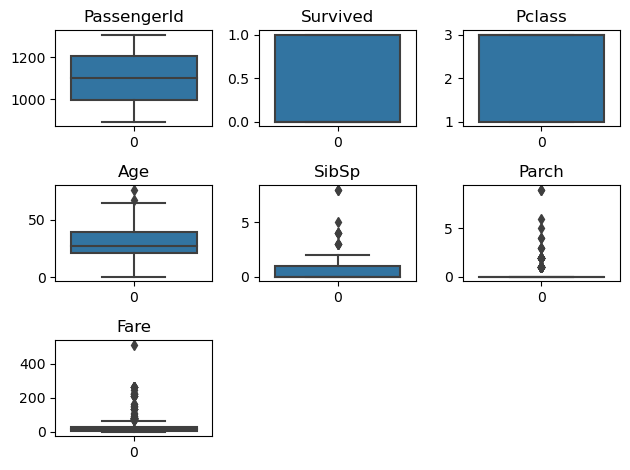

In [11]:
import matplotlib.pyplot as plt
a=3
b=3
i=1
for col in num_cols:
    plt.subplot(a,b,i)
    sns.boxplot(df.loc[:,col])
    i+=1
    plt.title(col)
    plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [12]:
df.Age.min(),df.Age.mean(),df.Age.max(),df.Age.median()


(0.17, 30.272590361445783, 76.0, 27.0)

In [13]:
# average age according to sex 
df.groupby('Sex')['Age'].mean()

# average age for both male and female are same so we 
#can impute null values in AGe eually for both of them

Sex
female    30.272362
male      30.272732
Name: Age, dtype: float64

In [14]:
df.Embarked.unique().tolist()

['Q', 'S', 'C']

<Axes: xlabel='Embarked', ylabel='Age'>

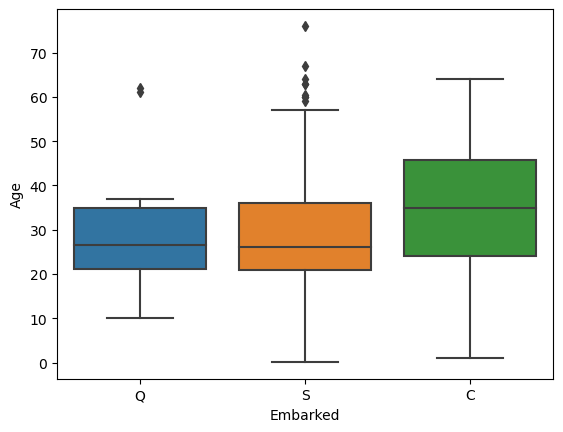

In [15]:
sns.boxplot(x='Embarked',y='Age', data=df)

<Axes: xlabel='Pclass', ylabel='Age'>

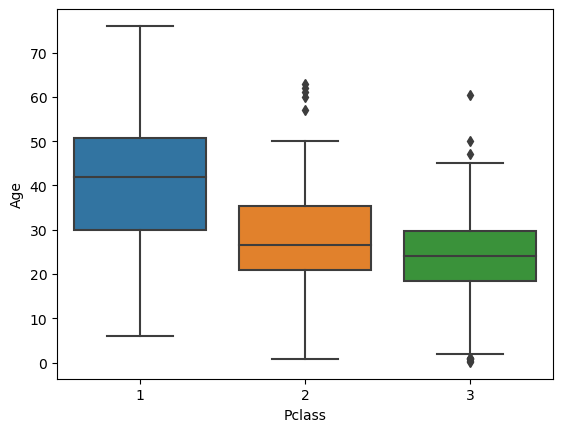

In [16]:
sns.boxplot(x='Pclass',y='Age', data=df)

<Axes: xlabel='Sex', ylabel='Age'>

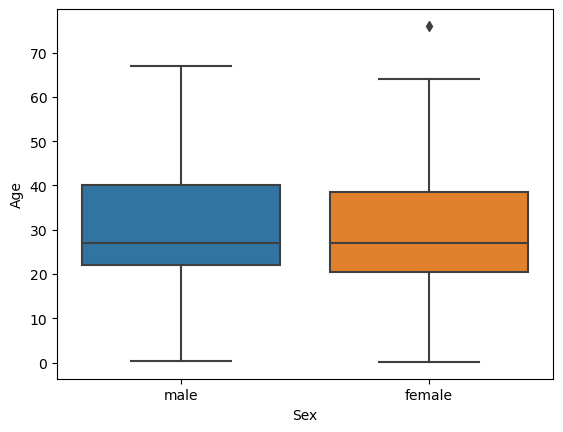

In [17]:
sns.boxplot(x='Sex',y='Age', data=df)

In [18]:
#  
df.groupby('Pclass')['Age'].median()

# average age for different classes are not  same

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [19]:
# average age according to Embarked 
df.groupby('Embarked')['Age'].median()

# average age for different embarked are not  same

Embarked
C    35.0
Q    26.5
S    26.0
Name: Age, dtype: float64

In [20]:
# in the box plot age is factor of Pclass so we fill null values with meadian
df.loc[(df['Pclass'] == 1) & (df['Age'].isnull()), 'Age'] = 42
df.loc[(df['Pclass'] == 2) & (df['Age'].isnull()), 'Age'] = 26.5
df.loc[(df['Pclass'] == 3) & (df['Age'].isnull()), 'Age'] = 24

In [21]:
df.groupby('Pclass')['Age'].median()

Pclass
1    42.0
2    26.5
3    24.0
Name: Age, dtype: float64

In [22]:
df=df.drop(columns='Cabin')

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [24]:
df.shape

(418, 11)

In [25]:
df= df.dropna()

In [26]:
df.shape

(417, 11)

<Axes: >

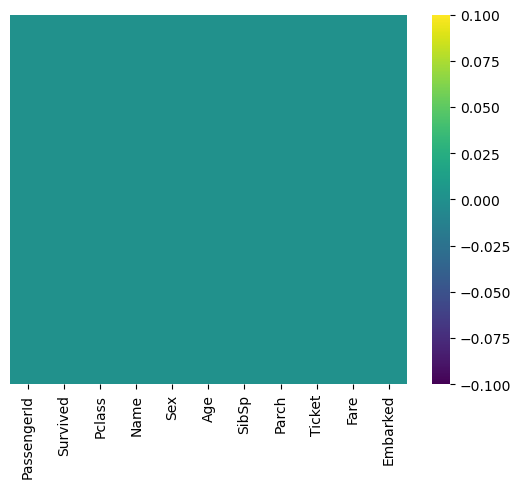

In [27]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [28]:
df.dtypes 

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [29]:
df.isnull().sum()

# now no null values present in our dataset

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

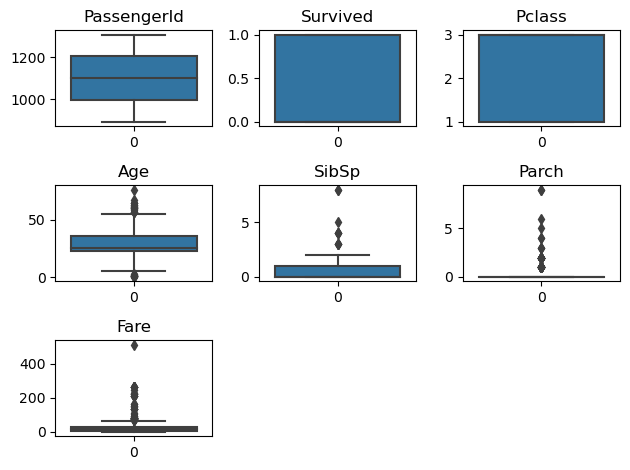

In [30]:
import matplotlib.pyplot as plt
a=3
b=3
i=1
for col in num_cols:
    plt.subplot(a,b,i)
    sns.boxplot(df[col])
    i+=1
    plt.title(col)
    plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

In [31]:
df.select_dtypes(include=np.number).columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [32]:
num_col=df.select_dtypes(include=np.number).columns
num_col

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [33]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [34]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,24.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,24.0,0,0,359309,8.0500,S


In [35]:
df['Age'] = df['Age'].astype(int)
df['Fare'] = df['Fare'].astype(int)

In [36]:
df['Embarked'] = df['Embarked'].map({'Q': 0,'S':1,'C':2}).astype(int)
df['Sex'] = df['Sex'].map( {'female': 1,'male':0}).astype(int)

In [37]:
#drop columns for using dataset
new_df = df.drop(['PassengerId','Name','Ticket'],axis = 1, inplace= True)

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


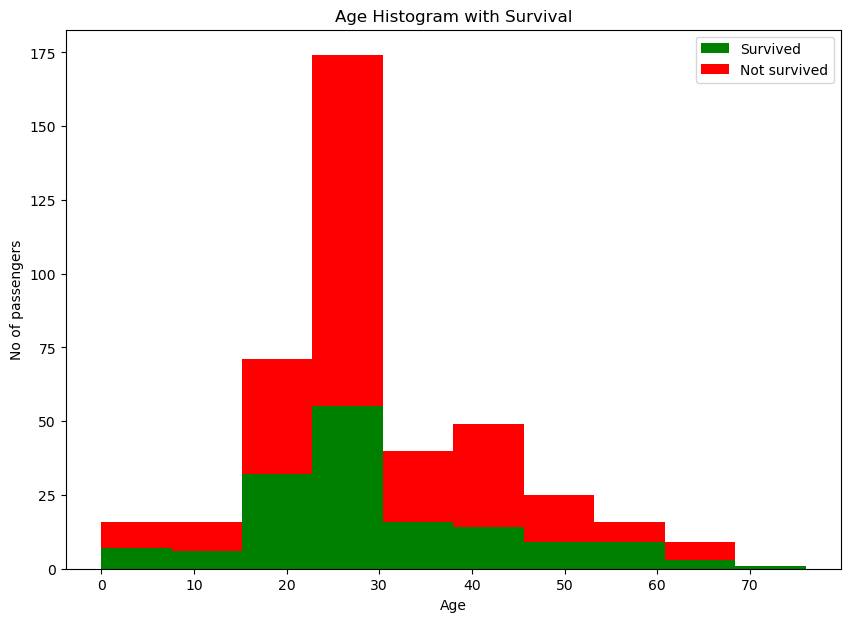

In [39]:
#Age Histogram with Survival

fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Age'], df[df['Survived']==0]['Age']],stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()
plt.show()

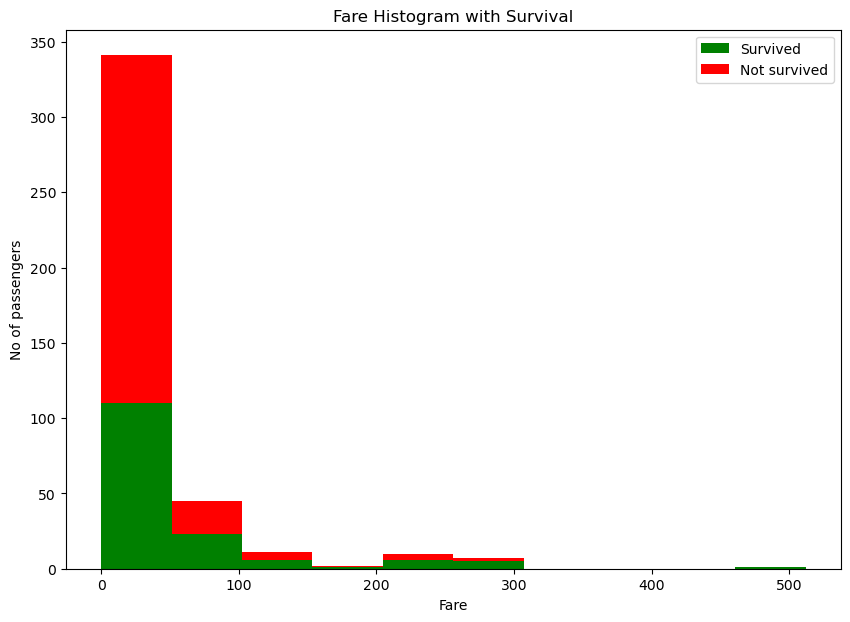

In [40]:
# fare histogram with survived
fig = plt.figure(figsize =(10, 7))
plt.hist(x = [df[df['Survived']==1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['g','r'],label = ['Survived','Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()
plt.show()

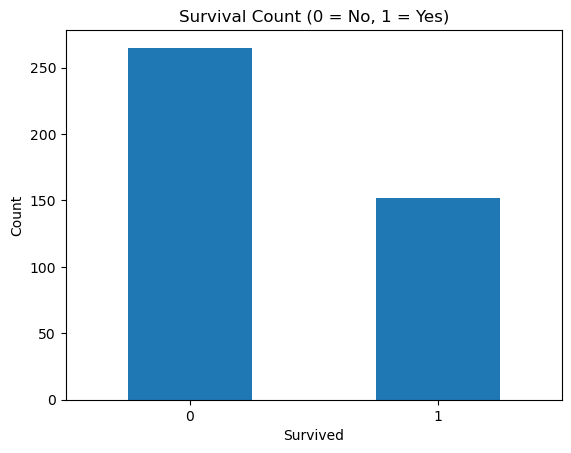

In [41]:
col = 'Survived'

# Create a bar chart
survival_counts = df[col].value_counts()
survival_counts.plot(kind='bar', rot=0)

# Adding labels and title
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count (0 = No, 1 = Yes)')

# Show the plot
plt.show()

In [42]:
df[col].value_counts(normalize=True)*100



0    63.549161
1    36.450839
Name: Survived, dtype: float64

<Axes: >

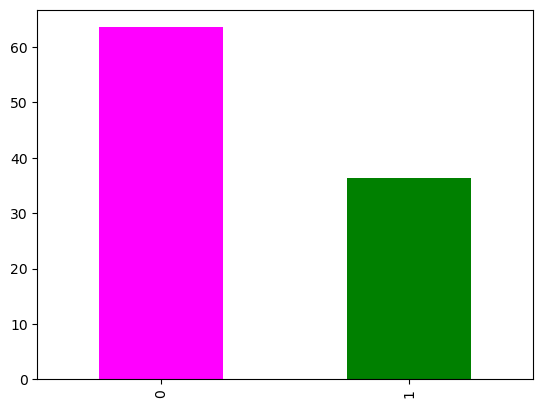

In [43]:
(df[col].value_counts(normalize=True)*100).plot.bar(color=['magenta','green'])

## no need to apply smote

# Base mode logistic regression

In [44]:
Train = df.drop(['Survived'], axis=1)
Test = df.iloc[:,1]
x_train, x_test, y_train, y_test = train_test_split(Train, Test, test_size = 0.2, random_state = 1)

In [45]:
LR = LogisticRegression(solver='liblinear', max_iter=200)
LR.fit(x_train, y_train)
y_pred = LR.predict(x_test)
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

Logistic regression accuracy: 94.05%


# Random Forest

In [46]:
from sklearn.ensemble import RandomForestClassifier


In [47]:
rf = RandomForestClassifier(n_estimators=10)


In [48]:
predrf = rf.fit(x_train,y_train).predict(x_test)


In [49]:
accuracy_score(y_test,predrf)


1.0

In [50]:
from sklearn.metrics import classification_report


In [51]:
print(classification_report(y_test,predrf))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        48

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [52]:
rf = RandomForestClassifier(n_estimators=100)
predrft = rf.fit(x_train,y_train).predict(x_train)


In [53]:
print(classification_report(y_train,predrft))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00       169

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



In [54]:
from sklearn.ensemble import AdaBoostClassifier


In [55]:
abc = AdaBoostClassifier(n_estimators=20)


In [56]:
predabc = abc.fit(x_train,y_train).predict(x_test)


In [57]:
print(classification_report(y_test,predabc))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        48

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [58]:
!pip install xgboost


In [59]:
from xgboost import XGBClassifier


In [60]:
xgb = XGBClassifier(n_estimators=20)


In [62]:
print(classification_report(y_test,predabc))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        18
           3       1.00      1.00      1.00        48

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [63]:
from sklearn.tree import DecisionTreeClassifier


In [64]:
dt = DecisionTreeClassifier()


In [65]:
preddt = dt.fit(x_train,y_train).predict(x_train)


In [66]:
print(classification_report(y_train,preddt))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        89
           2       1.00      1.00      1.00        75
           3       1.00      1.00      1.00       169

    accuracy                           1.00       333
   macro avg       1.00      1.00      1.00       333
weighted avg       1.00      1.00      1.00       333



In [ ]:
# Logistic regression accuracy=94.05%
 # Random Forest accuracy=100%
# Ada Boost accuracy=100%
#XgBoost accuracy=100%
#Decisin Tree accuracy=  100% 